## Impact of the parameters: Spectrum

Here is studied a more realistic case:
* z=0.1
* source spectrum is generated assuming a powerlaw spectrum (between Emin=1MeV and Emax=100TeV): $\Gamma =1.2$
* EGMF (turbulent magnetic field): 1E-15 Gauss, L_B= 1 Mpc
* EBL model: Dominguez

This part shows the impact on spectrum if we play with the different parameters.

#### Emax
* if Emax < Ecut (10TeV) => Ecut = Emax
* else no impact

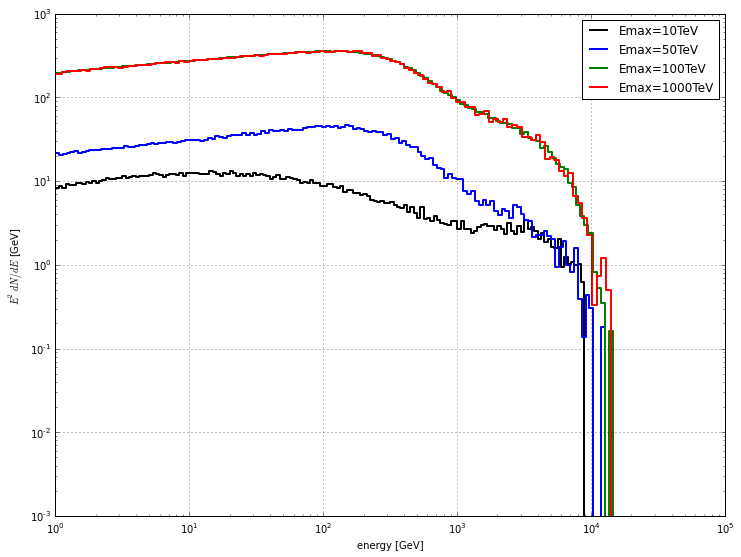

In [7]:
%matplotlib inline
import modules.spectrum
modules.spectrum.drawSpectrum(["Emax=10TeV","Emax=50TeV","Emax=100TeV","Emax=1000TeV"])

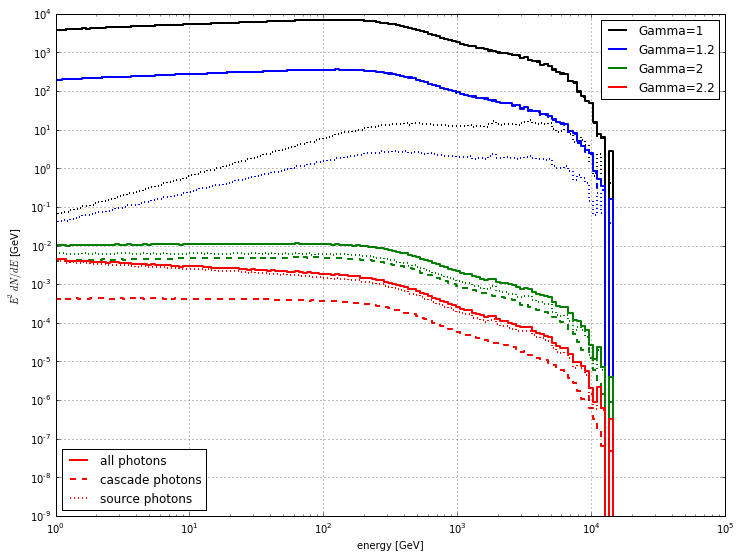

In [4]:
%matplotlib inline
import modules.spectrum
modules.spectrum.drawSpectrum(["Gamma=1","Gamma=1.2","Gamma=2","Gamma=2.2"],plot="cascade contribution")

Figure shows the integrated spectrum, for different intrinsic spectral indices $\Gamma$: 
1, 1.5, 2 and 2.5. The absorbed, primary spectra are also shown as dashed lines. All source 
photons (generation  0) with energy higher than $\approx$ 10 TeV are fully absorbed and 
redistributed on lower energies. This result is coherent with the cut-off energy computed 
(cf Target_spectrum_and_absorption.ipynb). For soft spectra with $\Gamma$<2, the contribution 
of the cascade dominates at low energy, with a shape close to the simple case spectrum especially 
the $\sqrt{E}$ distribution. Indeed because source spectrum is harder, more high energy gamma-rays 
are absorbed, increasing the contribution of the cascade to the final spectrum. At the opposite, 
a softer source spectrum dominates in the final spectrum. For hard source spectrum $\Gamma>$2, the 
contribution of the cascade become totally negligible. 


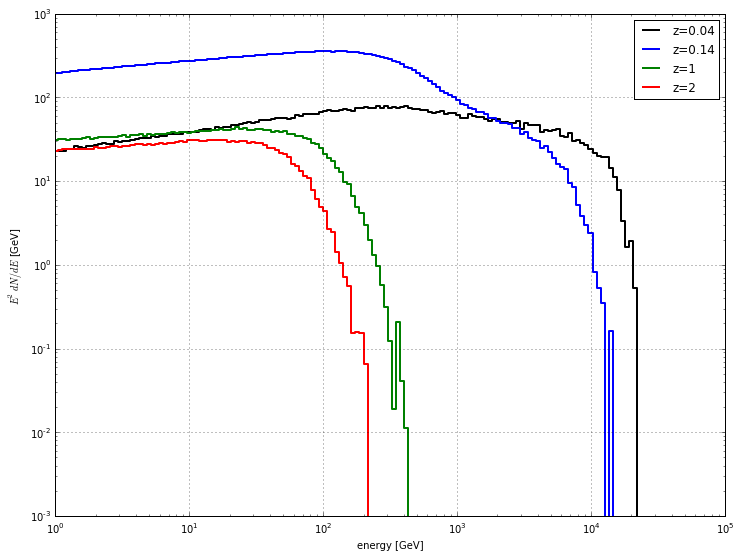

In [5]:
%matplotlib inline
import modules.spectrum
modules.spectrum.drawSpectrum(["z=0.04","z=0.14","z=1","z=2"])

The observed spectrum of a source is not only affected by its intrinsic spectrum but also by its
distance to Earth. Using the same source emitting with a power-law spectum $dN/dE = E^{-2}$, we 
only change the distance (z=0.0308$\sim 135$Mpc, z=0.1$\sim 432$Mpc, z=1$\sim 3411$Mpc). 
Figure 4 point out that the highest energy accessible in the spectrum decreases as the distance 
grows due to the full absorption of higher energy photons. This result is compatible with the cut-off 
energy presented in Target_spectrum_and_absorption.ipynb. Indeed distance of absorption 
($\lambda_{\gamma\gamma}$) shows that photons with lower energy can be absorbed because the mean free path 
become lower than the distance to the Earth. Then most secondary photons start to be absorbed producing third 
and fourth generation photons. The main 
consequence is that the contribution of the cascade increases with the distance until dominating 
even at low energy. Note that the all the sources are considered having the same intrinsic
luminosity. Due to the distance the luminosity observed is divided by a factor $1+z$. Then
the luminosity for a source at $z=1$ appears twice smaller than the others ($z \approx 0$).

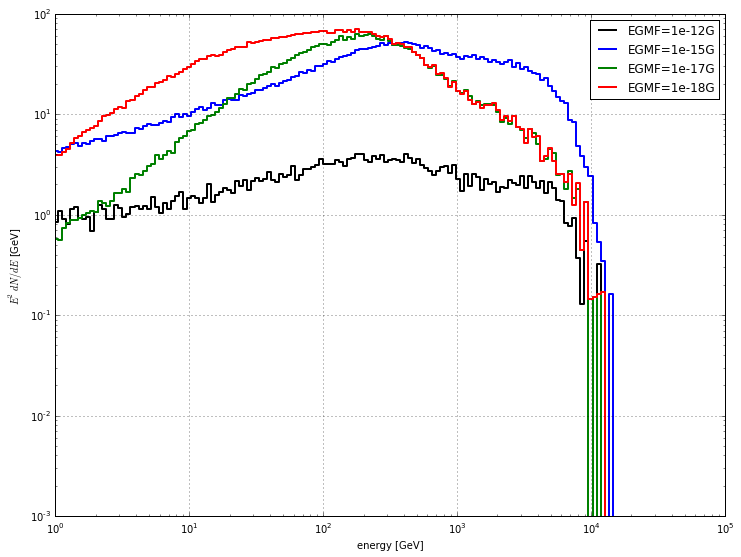

In [6]:
%matplotlib inline
import modules.spectrum
modules.spectrum.drawSpectrum(["EGMF=1e-12G","EGMF=1e-15G","EGMF=1e-17G","EGMF=1e-18G"],plot="1month")

The spectrum generated by the cascade depends also on the extragalactic medium. The extragalactic 
magnetic field (either amplitude or coherence length) has no impact on the spectrum integrated over
the full-sky and with an infinite integration time. If a limited aperture is applied, then part of 
the photons too much deflected are not taken  into account. This deflection is directly
related to the EGMF. For the same reason, applying a finite exposure time, corresponding to a finite 
time of activity of the source, will alter the spectrum shape depending on the EGMF strength. This has been shown in 
\cite{taylor_extragalactic_2011}. Figure shows the
spectrum integrated over the full sky and a time range of 10 years. Impact of the EGMF can
be seen on the 10 GeV - 10 TeV region of the spectrum. 

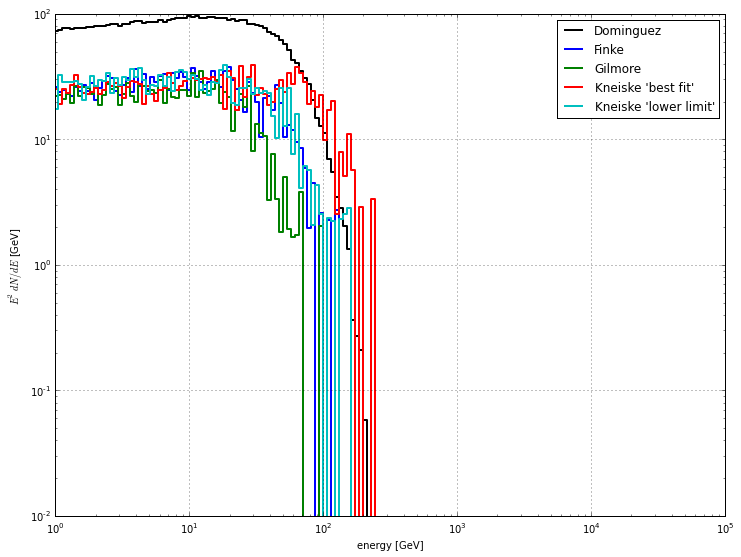

In [5]:
%matplotlib inline
import modules.spectrum
modules.spectrum.drawSpectrum(["Dominguez","Finke","Gilmore","Kneiske 'best fit'","Kneiske 'lower limit'"])

On the other hand the extragalactic light (EBL) can affect the absorption of the gamma-rays. Figure 
shows the spectrum Acomputed for a source emitting isotropically with a spectral index of 2 at a 
redshift z=2 using 6 different EBL models \citep{franceschini_extragalactic_2008,
dominguez_extragalactic_2010, finke_modeling_2010, kneiske_lower-limit_2010,
gilmore_semi-analytic_2011}. Differences only appear at energy up-to 1TeV and are due to the 
probability of gamma-rays absorption. Then the model chosen will impact the cut-off energy
with respect to the results shown in Target_spectrum_and_absorption.ipynb.


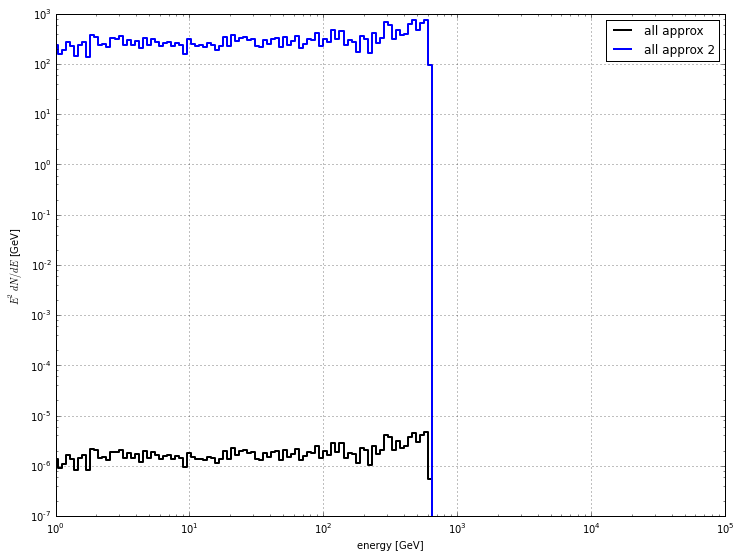

In [5]:
%matplotlib inline
import modules.spectrum
modules.spectrum.drawSpectrum(["all approx","all approx 2"])

### Considering BL Lacertae$^*$ blazar  spectrum

mean spectrum found in Sanchez 2013 (A&A): Evidence for a cosmological effect in γ-ray spectra of BL Lacertae

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: invalid value encountered in multiply


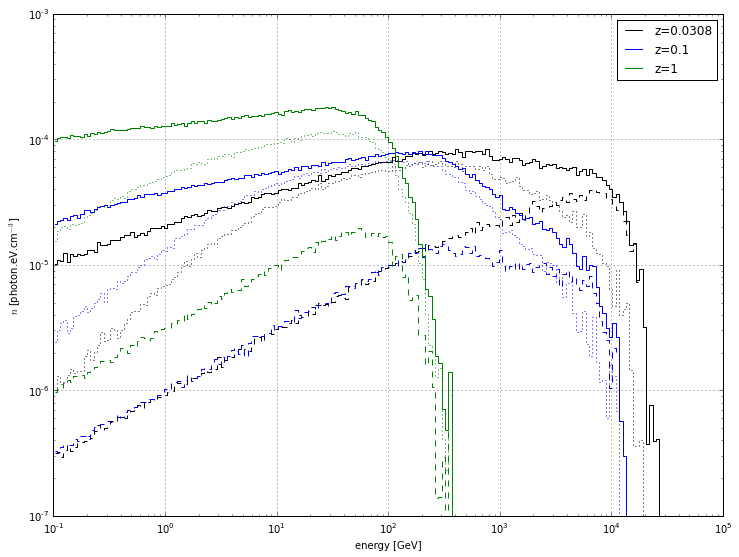

In [8]:
%matplotlib inline
from  matplotlib.pyplot import figure, show
from numpy import arange, select
from modules.read import ReadSpectrum, ReadSourceSpectrum, ReadProfile

ax = figure(figsize=(12,9)).add_subplot(111)
colors=['k','b','g','r','c','m','y']
i=0
for fileId in ["z=0.0308","z=0.1","z=1"]:
   ener,dNdE,dNdE0,dNdE1,dNdE2 = ReadSpectrum(fileId,[0,1,5,6,7])
   z=ReadProfile(fileId,[3])
   p = ax.plot(ener,ener**2 *dNdE*(1+z),drawstyle='steps-mid',color=colors[i],label=fileId)
   ax.plot(ener,ener**2 *(dNdE1+dNdE2)*(1+z),color=p[0].get_color(),drawstyle='steps-mid',linestyle=':')
   ax.plot(ener,ener**2 *dNdE0*(1+z),color=p[0].get_color(),drawstyle='steps-mid',linestyle='--')        
    
   Es,Fs = ReadSourceSpectrum(fileId,[0,1])
   Fs *= dNdE[0]/Fs[0]
   #ax.plot(Es,Es**2*Fs*(1+z),color=p[0].get_color(),linestyle='-')
        
   i+=1

   ax.legend(loc="best")
   ax.set_xscale('log')
   ax.set_yscale('log')
   ax.grid(b=True,which='major')
   ax.set_ylabel("$E^2 dN/dE$ [GeV]")
   ax.set_xlabel("energy [GeV]")

ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(b=True,which='major')
ax.set_xlabel("energy [GeV]")
ax.set_ylabel("$n$ [photon.eV.cm$^{-3}$]")
show()
